In [1]:
# magic function para hacer que los graficos de matplotlib se renderizen en el notebook.
%matplotlib notebook

import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
p08 = pd.read_csv("../../home/lucas/Descargas/properati-AR-2017-08-01-properties-rent-six_months.csv",\
                  infer_datetime_format=True)

In [13]:
#Miramos un poco que datos tenemos y procedemos a limpiarlos
p08.head(3)

,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,57df5f7e24ecc7231a698adcefbdbba413e08901,2017-02-01,rent,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-32.9494718,-60.6316587",...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boi_alquiler_dep...,"EXCELENTE DEPARTAMENTO DE 2 DORMITORIOS, PISO ...",J.M. DE ROSAS 929 - 2 DORMITORIOS,https://thumbs4.properati.com/6/qX-hlMZ1XwGXI5...
1,b7d96e89c2effc24d3659bf4f01405586724758b,2017-02-01,rent,PH,Temperley,|Argentina|Bs.As. G.B.A. Zona Sur|Lomas de Zam...,Argentina,Bs.As. G.B.A. Zona Sur,3427776.0,"-34.7676473285,-58.3859923587",...,4.0,NaN,1500.000000,NaN,NaN,NaN,http://www.properati.com.ar/15boj_alquiler_ph_...,BUEN PH EN ALQUILER EN TEMPERLEY ESTE. o 15440...,"BUEN PH , 3 ambientes ,EN ALQUILER en TEMPERLE...",https://thumbs4.properati.com/4/RDuQelGI1qnJmT...
2,48f63c9a441b5a66343abbae885a97d50ca8cb49,2017-02-01,rent,house,General Rodríguez,|Argentina|Bs.As. G.B.A. Zona Oeste|General Ro...,Argentina,Bs.As. G.B.A. Zona Oeste,3433780.0,"-34.6501160392,-58.9660339715",...,304.0,6.051118,107.894737,NaN,NaN,NaN,http://www.properati.com.ar/15bri_alquiler_cas...,CASA EN ALQUILER ANUAL CON OPCION A COMPRA- A...,"CASA ALQUILER ANUAL- EL NACIONAL, GRAL. RODRIGUEZ",https://thumbs4.properati.com/2/PPXbmserGHUVdC...


In [14]:
p08.dtypes

id                             object
created_on                     object
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbn

In [15]:
#Vemos un poco los tipos de datos que hay
p08['created_on'] = p08['created_on'].apply(pd.to_datetime)

In [17]:
p08.dtypes
p08.head(2)

,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,57df5f7e24ecc7231a698adcefbdbba413e08901,2017-02-01,rent,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-32.9494718,-60.6316587",...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boi_alquiler_dep...,"EXCELENTE DEPARTAMENTO DE 2 DORMITORIOS, PISO ...",J.M. DE ROSAS 929 - 2 DORMITORIOS,https://thumbs4.properati.com/6/qX-hlMZ1XwGXI5...
1,b7d96e89c2effc24d3659bf4f01405586724758b,2017-02-01,rent,PH,Temperley,|Argentina|Bs.As. G.B.A. Zona Sur|Lomas de Zam...,Argentina,Bs.As. G.B.A. Zona Sur,3427776.0,"-34.7676473285,-58.3859923587",...,4.0,NaN,1500.0,NaN,NaN,NaN,http://www.properati.com.ar/15boj_alquiler_ph_...,BUEN PH EN ALQUILER EN TEMPERLEY ESTE. o 15440...,"BUEN PH , 3 ambientes ,EN ALQUILER en TEMPERLE...",https://thumbs4.properati.com/4/RDuQelGI1qnJmT...


In [32]:
#Vemos los tipos de operaciones disponibles
p08.groupby('operation')
#Sólo tenemos operaciones del tipo 'rent'

,id,created_on,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
operation,,,,,,,,,,,,,,,,,,,,,
rent,18492,18492,18492,18488,18492,18492,18492,15500,11760,11760,...,14106,10207,12954,1338,6328,3374,18492,18491,18492,18138


In [4]:
#Miramos el archivo sell de agosto
ps208 = pd.read_csv('../../home/lucas/Descargas/properati-AR-2017-08-01-properties-sell.csv')
ps208.head(2)

,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,c8a66ee9e3da083ab66dacd165e8a5cc718b1cf2,2012-09-19,sell,house,San Antonio De Padua,|Argentina|Bs.As. G.B.A. Zona Oeste|Merlo|San ...,Argentina,Bs.As. G.B.A. Zona Oeste,3429244.0,NaN,...,93.0,360.36036,1290.322581,NaN,NaN,NaN,http://www.properati.com.ar/udh_venta_casa_mer...,CASA CON LOCAL EN VENTA EN PADUA.2 DORMITORIOS...,CASA EN VENTA,https://thumbs4.properati.com/1/ufoyqwscVk8n3e...
1,a205c53378e7879cf7519659317fb410c060d20e,2012-10-22,sell,house,San Antonio De Padua,|Argentina|Bs.As. G.B.A. Zona Oeste|Merlo|San ...,Argentina,Bs.As. G.B.A. Zona Oeste,3429244.0,NaN,...,220.0,1000.00000,1000.000000,NaN,NaN,NaN,http://www.properati.com.ar/20hi_venta_casa_me...,CHALET VENTA 4 AMBIENTES PADUA.EXCELENTE CHALE...,CASA EN VENTA,https://thumbs4.properati.com/5/I5RS_jAIUseo9H...


In [5]:
ps208.count()

id                            187482
created_on                    187482
operation                     187482
property_type                 187482
place_name                    187447
place_with_parent_names       187482
country_name                  187482
state_name                    187482
geonames_id                   158318
lat-lon                       118761
lat                           118761
lon                           118761
price                         154443
currency                      154441
price_aprox_local_currency    154443
price_aprox_usd               154443
surface_total_in_m2           125027
surface_covered_in_m2         152420
price_usd_per_m2              105024
price_per_m2                  131665
floor                          14294
rooms                          80320
expenses                       17520
properati_url                 187482
description                   187473
title                         187482
image_thumbnail               182814
d

In [33]:
#Buscamos en otros archivos a ver si existen otro tipo de operaciones
ps08 = pd.read_csv('../../home/lucas/Descargas/properati-AR-2017-08-01-properties-sell-six_months.csv')

In [34]:
ps08.head(3)

,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,ad916bad59cdaf3c24c2d594547aa6067c4d6289,2017-02-01,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,0de2ae882e1708c2941a672402f772ec83a92827,2017-02-01,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,61cb773b63b911ad2ea5c823187d7ba1c7f3cadf,2017-02-01,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...


In [35]:
ps08.dtypes

id                             object
created_on                     object
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbn

In [44]:
#Vemos que tipo de operaciones tienen
print("cantidad de registro:"+str(ps08.count()['id']))
print("cantidad de operaciones: "+str(ps08.groupby('operation').count()['id']))
#Las operaciones son todas sell y coinciden con la cantidad de registros

cantidad de registro:121220
cantidad de operaciones: operation
sell    121220
Name: id, dtype: int64


In [45]:
#Transformamos las fechas
ps08['created_on'] = ps08['created_on'].apply(pd.to_datetime)

In [47]:
ps08.head(2)
ps08.dtypes

id                                    object
created_on                    datetime64[ns]
operation                             object
property_type                         object
place_name                            object
place_with_parent_names               object
country_name                          object
state_name                            object
geonames_id                          float64
lat-lon                               object
lat                                  float64
lon                                  float64
price                                float64
currency                              object
price_aprox_local_currency           float64
price_aprox_usd                      float64
surface_total_in_m2                  float64
surface_covered_in_m2                float64
price_usd_per_m2                     float64
price_per_m2                         float64
floor                                float64
rooms                                float64
expenses  

In [55]:
#Como este archivo corresponde a agosto limpiamos los registros correspondientes a otros meses
ps08 = ps08[(ps08['created_on'] >= '2017-08-01') & (ps08['created_on'] <= '2017-08-31')]
ps08.head(5)

,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
120867,0582b4e7b99b299008b2502ee7d134cbbff99aea,2017-08-01,sell,apartment,Caballito,|Argentina|Capital Federal|Caballito|,Argentina,Capital Federal,3435874.0,NaN,...,160.0,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1cig5_venta_depart...,Excelente piso sobre Av. Alber...,Departamento - Caballito,https://thumbs4.properati.com/4/-31MEB4-qkkrEr...
120868,376987444d049f2fdb33b0d984a7331686d7a9a7,2017-08-01,sell,apartment,Caballito,|Argentina|Capital Federal|Caballito|,Argentina,Capital Federal,3435874.0,NaN,...,56.0,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1cig6_venta_depart...,Semipiso de 3 ambientes todo r...,Departamento - Caballito,https://thumbs4.properati.com/1/JEuG0GTRN1cGe3...
120869,ed24015ec0dc382a8ec233b3340988e888593f9f,2017-08-01,sell,apartment,Caballito,|Argentina|Capital Federal|Caballito|,Argentina,Capital Federal,3435874.0,NaN,...,142.0,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1cig7_venta_depart...,Piso de 4 ambientes con depend...,Departamento - Caballito,https://thumbs4.properati.com/9/OnrB2dOwaG-cG5...
120870,b8e58f31cbb01828e583e0f47413d8701424e980,2017-08-01,sell,apartment,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,Capital Federal,3430234.0,NaN,...,34.0,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1cig8_venta_depart...,IMPECABLE TORRE COY III – DEPA...,Departamento - Palermo Soho,https://thumbs4.properati.com/6/M8EZL8DFe9Fb8t...
120871,ca5bec2573400220c2bd7690d85a85506c56308e,2017-08-01,sell,apartment,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,Capital Federal,3430234.0,NaN,...,50.0,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1cig9_venta_depart...,IMPECABLE TORRE COY III – HERM...,Departamento - Palermo Soho,https://thumbs4.properati.com/1/lQgj0j1UMVlAQj...


In [57]:
ps08.groupby('state_name').count()

,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
state_name,,,,,,,,,,,,,,,,,,,,,
Bs.As. G.B.A. Zona Norte,46,46,46,46,46,46,46,42,0,0,...,44,29,37,0,0,8,46,46,46,45
Bs.As. G.B.A. Zona Oeste,8,8,8,8,8,8,8,8,0,0,...,7,1,1,0,0,0,8,8,8,7
Bs.As. G.B.A. Zona Sur,13,13,13,13,13,13,13,11,0,0,...,13,5,11,0,0,3,13,13,13,13
Buenos Aires Costa Atlántica,3,3,3,3,3,3,3,1,0,0,...,3,2,3,0,0,1,3,3,3,3
Capital Federal,192,192,192,192,192,192,192,188,38,38,...,186,48,54,0,0,31,192,192,192,188
Corrientes,1,1,1,1,1,1,1,1,0,0,...,1,1,1,0,0,1,1,1,1,1
Córdoba,58,58,58,58,58,58,58,58,1,1,...,6,50,4,0,0,1,58,58,58,19
Mendoza,2,2,2,2,2,2,2,2,0,0,...,2,1,2,0,0,2,2,2,2,2
San Luis,1,1,1,1,1,1,1,1,0,0,...,1,0,1,0,0,0,1,1,1,1


In [60]:
#Filtramos las propiedades de capital federal
ps08 = ps08[ps08['state_name'].str.contains('ederal')]['state_name'].count()

192

In [62]:
#Tenemos sólo 192 propiedades de capital federal
ps08 = ps08[ps08['state_name'].str.contains('ederal')]

# ¿De qué tamaño son las propiedades más demandadas?¿A qué barrios/comunas corresponden?

In [64]:
#Hacemos un analisis preliminar para el mes de agosto
#Vemos lo que tenemos por ahora
ps08.head(2)
ps08.dtypes

id                                    object
created_on                    datetime64[ns]
operation                             object
property_type                         object
place_name                            object
place_with_parent_names               object
country_name                          object
state_name                            object
geonames_id                          float64
lat-lon                               object
lat                                  float64
lon                                  float64
price                                float64
currency                              object
price_aprox_local_currency           float64
price_aprox_usd                      float64
surface_total_in_m2                  float64
surface_covered_in_m2                float64
price_usd_per_m2                     float64
price_per_m2                         float64
floor                                float64
rooms                                float64
expenses  

In [115]:
more_d = ps08.groupby('surface_total_in_m2').count().sort_values('id',ascending=False)[["surface_covered_in_m2"]]
#more_d.reset_index
more_d

,surface_covered_in_m2
surface_total_in_m2,
39.0,27
46.0,21
38.0,16
71.0,11
62.0,6
51.0,5
35.0,2
37.0,4
121.0,4


In [6]:
#Para agosto:
#La mayor cantidad de propiedades vendidas corresponde a las comprendidas entre los 38m2 y los 46m2.
more_d.head(10).plot.bar()

NameError: name 'more_d' is not defined

In [118]:
ps08.to_csv("../../home/lucas/academico/datos/tp1/properati-sell-processed-08.csv")

In [65]:
#Tomamos un rango de tiempo más grande y analizamos las propiedades correspondientes al año actual.
ps08 = pd.read_csv("../../home/lucas/academico/datos/tp1/properati-sell-processed-08.csv")

In [82]:
ps08.count()['id']

192

In [13]:
ps07 = pd.read_csv("../../home/lucas/academico/datos/tp1/csv_originales/properati-AR-2017-07-01-properties-sell-six_months.csv")

In [14]:
ps07.head(2)

,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,e3cb52c36e2210586ddf90fd0443261ea2e5511f,2017-01-01,sell,house,Quilmes,|Argentina|Bs.As. G.B.A. Zona Sur|Quilmes|Quil...,Argentina,Bs.As. G.B.A. Zona Sur,3429651.0,"-34.744616,-58.277365",...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/14mll_venta_casa_q...,Corredor Responsable: Martin Veltri - C.M.Q 80...,Casa en Venta Quilmes,https://thumbs4.properati.com/7/JUtDrSg4Bi2svp...
1,f1840b53eab0efe00661a89fb38a2c14bb159708,2017-01-01,sell,house,Punilla,|Argentina|Córdoba|Punilla|,Argentina,Córdoba,3839996.0,"-31.447378,-64.518655",...,185.0,NaN,702.702703,NaN,5.0,NaN,http://www.properati.com.ar/14mlv_venta_casa_p...,Corredor Responsable: DANIELA E. CASTRO - CPCP...,Inverti! 2 Casas C/Pileta Carlos Paz,https://thumbs4.properati.com/6/6rEVlpVxiop3Bh...


In [15]:
ps07.dtypes

id                             object
created_on                     object
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbn

In [16]:
ps07['created_on'] = ps07['created_on'].apply(pd.to_datetime)

In [17]:
ps07.dtypes

id                                    object
created_on                    datetime64[ns]
operation                             object
property_type                         object
place_name                            object
place_with_parent_names               object
country_name                          object
state_name                            object
geonames_id                          float64
lat-lon                               object
lat                                  float64
lon                                  float64
price                                float64
currency                              object
price_aprox_local_currency           float64
price_aprox_usd                      float64
surface_total_in_m2                  float64
surface_covered_in_m2                float64
price_usd_per_m2                     float64
price_per_m2                         float64
floor                                float64
rooms                                float64
expenses  

In [19]:
#Como este archivo corresponde a julio limpiamos los registros correspondientes a otros meses
ps07 = ps07[(ps07['created_on'] >= '2017-07-01') & (ps07['created_on'] <= '2017-07-31')]
ps07.head(2)

,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
80236,18fc384e6b758175d6663faf84efad355d4c5c54,2017-07-01,sell,house,Villa del Parque,|Argentina|Capital Federal|Villa del Parque|,Argentina,Capital Federal,3427455.0,"-34.5974907,-58.4866893",...,NaN,1253.164557,NaN,NaN,4.0,NaN,http://www.properati.com.ar/19nl9_venta_casa_v...,"Excelente Chalet de 4 ambientes, en dos planta...",Casa venta,https://thumbs4.properati.com/7/HLj1yuBmHYj6Pv...
80237,d3fa6320ac1861afe9a4fe98cb713d29798f3352,2017-07-01,sell,house,Coronel Moldes,|Argentina|Salta|Coronel Moldes|,Argentina,Salta,3860179.0,"-25.2804197,-65.477208",...,78.0,53.368832,17628.205128,NaN,3.0,NaN,http://www.properati.com.ar/19nla_venta_casa_c...,"Hermosas casas en construcción, en la compra v...",Casa venta,https://thumbs4.properati.com/9/iG3vV-AqbDvbpk...


In [20]:
ps07.count()

id                            22
created_on                    22
operation                     22
property_type                 22
place_name                    22
place_with_parent_names       22
country_name                  22
state_name                    22
geonames_id                   20
lat-lon                       22
lat                           22
lon                           22
price                         21
currency                      21
price_aprox_local_currency    21
price_aprox_usd               21
surface_total_in_m2           22
surface_covered_in_m2         15
price_usd_per_m2              21
price_per_m2                  15
floor                          0
rooms                         22
expenses                       6
properati_url                 22
description                   22
title                         22
image_thumbnail               22
dtype: int64

In [21]:
ps07.to_csv("../../home/lucas/academico/datos/tp1/properati-sell-processed-07.csv")

In [25]:
#Junio,Mayo,Abril,Marzo,Febrero y Enero
ps06 = pd.read_csv("../../home/lucas/academico/datos/tp1/csv_originales/properati-AR-2017-06-01-properties-sell.csv")
ps06.count()['id']

85790

In [34]:
ps06['created_on'] = ps06['created_on'].apply(pd.to_datetime)
ps06 = ps06[(ps06['created_on'] >= '2017-06-01') & (ps06['created_on'] <= '2017-06-30')]
print("Cantidad procesados: "+str(ps06.count()['id']))
ps06 = ps06[ps06['state_name'].str.contains('ederal')]
print("Cantidad procesados CABA: "+str(ps06.count()['id']))
ps06.head(2)

Cantidad procesados: 3323
Cantidad procesados CABA: 3323


,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
74493,2ba91ce3876eaa42a31dcf0ac7405bbf9a848461,2017-06-01,sell,apartment,Flores,|Argentina|Capital Federal|Flores|,Argentina,Capital Federal,3433918.0,"-34.632409,-58.461642",...,123.0,NaN,1788.617886,4.0,4.0,NaN,http://www.properati.com.ar/18s3e_venta_depart...,Corredor Responsable: Mariano Aufseher - CUCIC...,¡VENTA DEPTO.4 AMB C/DEP. EN FLORES!,https://thumbs4.properati.com/0/aJeQzi1XZDCQL4...
74494,d7d1a5b31c2245e6602d83f809762db63012e932,2017-06-01,sell,apartment,Constitución,|Argentina|Capital Federal|Constitución|,Argentina,Capital Federal,3435257.0,NaN,...,70.0,NaN,1000.000000,NaN,2.0,NaN,http://www.properati.com.ar/18s3f_venta_depart...,Corredor Responsable: Mariano Aufseher - CUCIC...,AMPLIO 2 AMB RECICLADO,https://thumbs4.properati.com/6/b0_fkg_8CR6Q3s...


In [57]:
ps06.to_csv("../../home/lucas/academico/datos/tp1/properati-sell-processed-06.csv")

In [38]:
ps05 = pd.read_csv("../../home/lucas/academico/datos/tp1/csv_originales/properati-AR-2017-05-01-properties-sell.csv")
ps05.count()['id']

82377

In [39]:
ps05['created_on'] = ps05['created_on'].apply(pd.to_datetime)
ps05 = ps05[(ps05['created_on'] >= '2017-05-01') & (ps05['created_on'] <= '2017-05-31')]
print("Cantidad procesados: "+str(ps05.count()['id']))
ps05 = ps05[ps05['state_name'].str.contains('ederal')]
print("Cantidad procesados CABA: "+str(ps05.count()['id']))
ps05.head(2)
#No existen registros para el mes de Mayo

Cantidad procesados: 18629
Cantidad procesados CABA: 5577


,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
63762,60f9d93b3eb34996c9dc48e297a3cf20b1b3b7ce,2017-05-01,sell,apartment,Barrio Norte,|Argentina|Capital Federal|Barrio Norte|,Argentina,Capital Federal,3436109.0,"-34.585958,-58.403988",...,162.0,NaN,4091.839506,1.0,4.0,NaN,http://www.properati.com.ar/17v8g_venta_depart...,Corredor Responsable: Luis Varela - CSI 5527 /...,BARRIO NORTE THE EDGE OPORTUNIDAD 4 AMB SEG,https://thumbs4.properati.com/2/pVqOfHuxL6IHa6...
63763,2dc940ad3b8cc3bdb3c53122940e7b3f5196cb7e,2017-05-01,sell,apartment,Barrio Norte,|Argentina|Capital Federal|Barrio Norte|,Argentina,Capital Federal,3436109.0,"-34.585958,-58.403988",...,134.0,NaN,4085.335821,1.0,4.0,NaN,http://www.properati.com.ar/17v8h_venta_depart...,Corredor Responsable: Luis Varela - CSI 5527 /...,BARRIO NORTE THE EDGE OPORTUNIDAD 4 AMB SEG,https://thumbs4.properati.com/2/pVqOfHuxL6IHa6...


In [41]:
# Deberían ser todas las operaciones tipo sell
assert ps05.count()['id'] == ps05[ps05['operation'] == 'sell'].count()['id']

In [42]:
ps05.to_csv("../../home/lucas/academico/datos/tp1/properati-sell-processed-05.csv")

In [56]:
#Abril
ps04 = pd.read_csv("../../home/lucas/academico/datos/tp1/csv_originales/properati-AR-2017-04-01-properties-sell.csv")
print("Cantidad de registros originales: "+str(ps04.count()['id']))
print("")
ps04['created_on'] = ps04['created_on'].apply(pd.to_datetime)
ps04 = ps04[(ps04['created_on'] >= '2017-04-01') & (ps04['created_on'] <= '2017-04-30')]
print("Cantidad procesados: "+str(ps04.count()['id']))
ps04 = ps04[ps04['state_name'].str.contains('ederal')]
print("Cantidad procesados CABA: "+str(ps04.count()['id']))


assert ps04.count()['id'] == ps04[ps04['operation'] == 'sell'].count()['id']

ps04.to_csv("../../home/lucas/academico/datos/tp1/properati-sell-processed-04.csv")

ps04.head(2)

Cantidad de registros originales: 70631

Cantidad procesados: 15650
Cantidad procesados CABA: 5250


,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
54278,cbec458c56f942a8fe61a3d30c891e0754c02a09,2017-04-01,sell,house,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955.0,NaN,...,440.0,878.594249,2500.000000,NaN,NaN,NaN,http://www.properati.com.ar/16zw2_venta_casa_b...,EXCELENTE CHALET DE 1 PLANTA EN LA HORQUETA. T...,"Casa 1252m² con Dependencias en Reclus, Eliseo...",https://thumbs4.properati.com/2/mGJZIuZc8iizeX...
54287,3b89190788c6d3a4748b5451278647e6099ffae4,2017-04-01,sell,house,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955.0,NaN,...,118.0,1266.375546,2457.627119,NaN,NaN,NaN,http://www.properati.com.ar/16zwl_venta_casa_b...,"Casa en la Horqueta, desarrollada en dos plant...","Casa 229m² con Cochera, Argentina, Capital Fed...",https://thumbs4.properati.com/3/BnO7mVFc7XZcq5...


In [46]:
#Marzo
ps03 = pd.read_csv("../../home/lucas/academico/datos/tp1/csv_originales/properati-AR-2017-03-01-properties-sell.csv")
print("Cantidad de registros originales: "+str(ps03.count()['id']))
print("")
ps03['created_on'] = ps03['created_on'].apply(pd.to_datetime)
ps03 = ps03[(ps03['created_on'] >= '2017-03-01') & (ps03['created_on'] <= '2017-03-31')]
print("Cantidad procesados: "+str(ps03.count()['id']))
ps03 = ps03[ps03['state_name'].str.contains('ederal')]
print("Cantidad procesados CABA: "+str(ps03.count()['id']))


assert ps03.count()['id'] == ps03[ps03['operation'] == 'sell'].count()['id']

ps03.to_csv("../../home/lucas/academico/datos/tp1/properati-sell-processed-03.csv")

ps03.head(2)

Cantidad de registros originales: 65521

Cantidad procesados: 15288
Cantidad procesados CABA: 5438


,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
45459,ae36b32cc198bad74af8e3d5cdfd00a93a4c43ca,2017-03-01,sell,apartment,Colegiales,|Argentina|Capital Federal|Colegiales|,Argentina,Capital Federal,3435356.0,"-34.5826411,-58.4518346",...,41.0,3229.166667,3780.487805,NaN,2.0,NaN,http://www.properati.com.ar/1622a_venta_depart...,Excelente 2 ambientes en edificio único. Antig...,ESTUPENDO 2 AMB EN COLEGIALES - EXCELENTES AME...,https://thumbs4.properati.com/6/aVxV3cnlFqeoOH...
45464,87354eba6b4a0e87ff45af971b930c7b918034cf,2017-03-01,sell,store,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955.0,"-34.5972002,-58.3918164",...,60.0,5000.000000,5000.000000,NaN,4.0,3800.0,http://www.properati.com.ar/1622o_venta_local_...,Distinguido local en Recoleta. Cuenta con una ...,Local venta,https://thumbs4.properati.com/7/MYi74ADuSMzG2C...


In [48]:
#Febrero
ps02 = pd.read_csv("../../home/lucas/academico/datos/tp1/csv_originales/properati-AR-2017-02-01-properties-sell.csv")
print("Cantidad de registros originales: "+str(ps02.count()['id']))
print("")
ps02['created_on'] = ps02['created_on'].apply(pd.to_datetime)
ps02 = ps02[(ps02['created_on'] >= '2017-02-01') & (ps02['created_on'] <= '2017-02-28')]
print("Cantidad procesados: "+str(ps02.count()['id']))
ps02 = ps02[ps02['state_name'].str.contains('ederal')]
print("Cantidad procesados CABA: "+str(ps02.count()['id']))

assert ps02.count()['id'] == ps02[ps02['operation'] == 'sell'].count()['id']

ps02.head(2)

ps02.to_csv("../../home/lucas/academico/datos/tp1/properati-sell-processed-02.csv")

Cantidad de registros originales: 64479

Cantidad procesados: 14166
Cantidad procesados CABA: 3575


In [55]:
#Enero
ps01 = pd.read_csv("../../home/lucas/academico/datos/tp1/csv_originales/properati-AR-2017-01-01-properties-sell.csv.gz")
print("Cantidad de registros originales: "+str(ps01.count()['id']))
print("")
ps01['created_on'] = ps01['created_on'].apply(pd.to_datetime)
ps01 = ps01[(ps01['created_on'] >= '2017-01-01') & (ps01['created_on'] <= '2017-01-31')]
print("Cantidad procesados: "+str(ps01.count()['id']))
ps01 = ps01[ps01['state_name'].str.contains('ederal')]
print("Cantidad procesados CABA: "+str(ps01.count()['id']))

assert ps01.count()['id'] == ps01[ps01['operation'] == 'sell'].count()['id']

ps01.head(2)

ps01.to_csv("../../home/lucas/academico/datos/tp1/properati-sell-processed-01.csv")

Cantidad de registros originales: 59806

Cantidad procesados: 11815
Cantidad procesados CABA: 3154


In [85]:
frames = [ps01,ps02,ps03,ps04,ps05,ps06,ps07,ps08]
total = pd.concat(frames)

In [86]:
#Juntamos todos los registros para hacer un histograma
assert total.count()['id'] == int(ps01.count()['id']) + int(ps02.count()['id']) + int(ps03.count()['id']) + int(ps04.count()['id']) + int(ps05.count()['id']) + int(ps06.count()['id']) + int(ps07.count()['id']) + int(ps08.count()['id']) 
print('TEST OK')

TEST OK


In [83]:
ps08['created_on'] = ps08['created_on'].apply(pd.to_datetime)

In [87]:
total.dtypes

Unnamed: 0                           float64
country_name                          object
created_on                    datetime64[ns]
currency                              object
description                           object
expenses                             float64
floor                                float64
geonames_id                          float64
id                                    object
image_thumbnail                       object
lat                                  float64
lat-lon                               object
lon                                  float64
operation                             object
place_name                            object
place_with_parent_names               object
price                                float64
price_aprox_local_currency           float64
price_aprox_usd                      float64
price_per_m2                         float64
price_usd_per_m2                     float64
properati_url                         object
property_t

In [117]:
s = total.groupby('surface_covered_in_m2').count().sort_values('id',ascending=False)['id']
s = s.reset_index().rename(columns={'id':'count'})
s.head(2)

,surface_covered_in_m2,count
0,30.0,826
1,40.0,762


In [120]:
#Removemos casos de mucha superficie que no parece tener sentido
s.tail(5)
s = s[s['surface_covered_in_m2'] < 600]
s.tail(5)

,surface_covered_in_m2,count
544,495.0,1
545,7.0,1
546,504.0,1
547,284.0,1
548,520.0,1


<IPython.core.display.Javascript object>


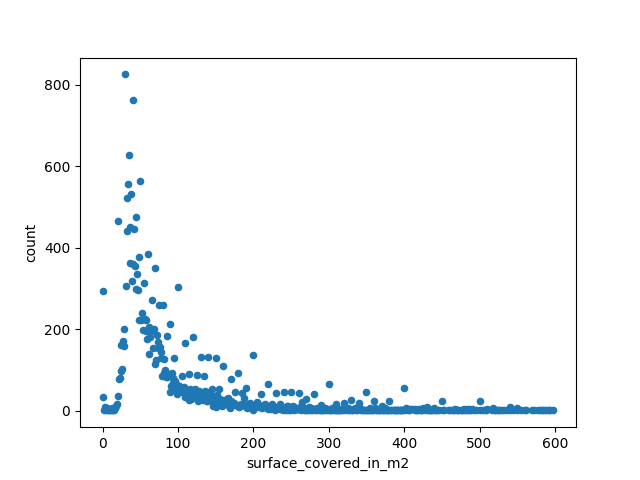

In [127]:
#plt.hist(s,alpha=0.5,stacked=True, bins=10,x='test')
#s.plot(x='surface_covered_in_m2',y='count')
s.plot(x='surface_covered_in_m2',y='count',kind='scatter')#line

In [ ]:
#Se puede ver en el grafico que a medida que aumenta el tamaño de la propiedad la cantidad de ventas disminuye.
#Entonces las propiedades más demandadas ó más vendidas son las que tienen pocos metros cuadrados.

In [128]:
#Recortemos el rango de las propiedades para aquellas hasta 100 metros cuadrados
s100 = s[s['surface_covered_in_m2'] < 101]

<IPython.core.display.Javascript object>


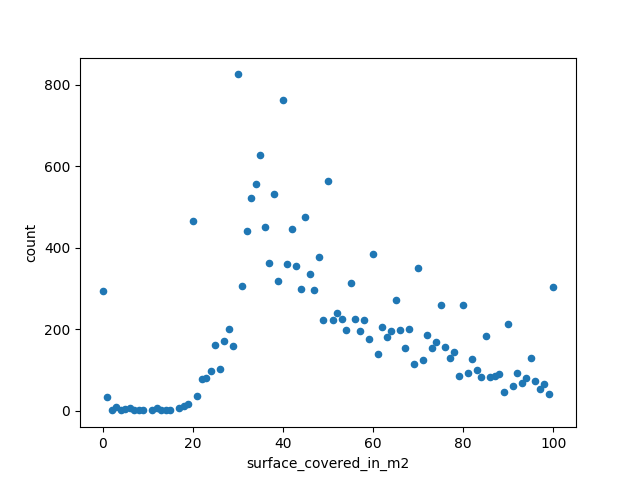

In [199]:
s100.plot(x='surface_covered_in_m2',y='count',kind='scatter')#line
#x = s100['surface_covered_in_m2']
#y = s100['count']
#z = np.polyfit(x, y, 1)

#p = np.poly1d(z)
#plt.plot(x,p(x),"r--")

#plt.show()

In [ ]:
#En el gráfico anterior se puede ver con mayor precisión que las unidades de entre 30 ~ 60 m2 son las mas vendidas.

# ¿A qué barrios ó comunas corresponden las unidades más demandadas?

In [132]:
#Sobre la base de los registros procesados tomamos agrupamos por barrios
total.head(2)
total.dtypes

Unnamed: 0                           float64
country_name                          object
created_on                    datetime64[ns]
currency                              object
description                           object
expenses                             float64
floor                                float64
geonames_id                          float64
id                                    object
image_thumbnail                       object
lat                                  float64
lat-lon                               object
lon                                  float64
operation                             object
place_name                            object
place_with_parent_names               object
price                                float64
price_aprox_local_currency           float64
price_aprox_usd                      float64
price_per_m2                         float64
price_usd_per_m2                     float64
properati_url                         object
property_t

In [149]:
total[['currency','description','surface_covered_in_m2','rooms','property_type']].head(2)

,currency,description,surface_covered_in_m2,rooms,property_type
35366,USD,Corredor Responsable: Juan Carlos Treco - CUCI...,43.0,1.0,apartment
35367,USD,Corredor Responsable: Juan Carlos Treco - CUCI...,38.0,1.0,apartment


In [156]:
total[['price_aprox_local_currency','floor','operation','place_name']]

,price_aprox_local_currency,floor,operation,place_name
35366,1740566.50,NaN,sell,Villa Urquiza
35367,1435568.15,NaN,sell,Villa Urquiza
35369,1277480.00,NaN,sell,San Telmo
35371,3193700.00,NaN,sell,Centro / Microcentro
35380,2714645.00,NaN,sell,Flores
35381,5109920.00,NaN,sell,Colegiales
35384,6052061.50,NaN,sell,Colegiales
35385,7824565.00,NaN,sell,Colegiales
35386,2986109.50,NaN,sell,Colegiales
35389,4710707.50,NaN,sell,Recoleta


# ¿A qué barrios/comunas corresponden las unidades más vendidas?

In [154]:
total.head(5)

,Unnamed: 0,country_name,created_on,currency,description,expenses,floor,geonames_id,id,image_thumbnail,...,price_aprox_usd,price_per_m2,price_usd_per_m2,properati_url,property_type,rooms,state_name,surface_covered_in_m2,surface_total_in_m2,title
35366,NaN,Argentina,2017-01-01,USD,Corredor Responsable: Juan Carlos Treco - CUCI...,NaN,NaN,3433775.0,2e61de575b2653733dc55aaed4b08a1e9ae13563,https://thumbs4.properati.com/7/q07Sye4wLYyM3m...,...,109000.0,2534.883721,NaN,http://www.properati.com.ar/14mm2_venta_depart...,apartment,1.0,Capital Federal,43.0,NaN,2 AMBIENTES A ESTRENAR C/BALCÓN VILLA URQUIZA
35367,NaN,Argentina,2017-01-01,USD,Corredor Responsable: Juan Carlos Treco - CUCI...,NaN,NaN,3433775.0,5a66865f29a02dbfa89d04ad66e91162c368eb99,https://thumbs4.properati.com/8/HfKdACQrN2vqJi...,...,89900.0,2365.789474,NaN,http://www.properati.com.ar/14mm3_venta_depart...,apartment,1.0,Capital Federal,38.0,NaN,2 Ambientes / Monoambiente con balcon a estrenar
35369,NaN,Argentina,2017-01-01,USD,Corredor Responsable: Ariel Champanier - CUCIC...,NaN,NaN,3428113.0,3efd73a285f946226b724d288ed42dae9d450d86,https://thumbs4.properati.com/9/Tg9Jl-mK-O-8IP...,...,80000.0,1702.127660,NaN,http://www.properati.com.ar/14mo0_venta_depart...,apartment,3.0,Capital Federal,47.0,NaN,Depto 3 amb San Telmo Apto Credito!!!!
35371,NaN,Argentina,2017-01-01,USD,Corredor Responsable: Cristian Arnal Ponti - C...,NaN,NaN,3435548.0,d3f8158c772e668eb92e239c6d9979c8db2711d7,https://thumbs4.properati.com/8/ndSSd-0jIfeez6...,...,200000.0,10000.000000,NaN,http://www.properati.com.ar/14moh_venta_local_...,store,NaN,Capital Federal,20.0,NaN,Importante local en zona de alto trafico peatonal
35380,NaN,Argentina,2017-01-01,USD,"Departamento de 3 ambientes con dependencia, e...",NaN,NaN,3433918.0,5a330340c7de7f7fc1c12a649de8164b8b0df60b,https://thumbs4.properati.com/4/VZYqoMHnnjzxn3...,...,170000.0,1888.888889,1700.0,http://www.properati.com.ar/14mq6_venta_depart...,apartment,NaN,Capital Federal,90.0,100.0,Departamento de 3 ambientes con dependencia de...


In [169]:
total_sell = total
#total_sell['count'] = 1
total_sell.head(5)

,Unnamed: 0,country_name,created_on,currency,description,expenses,floor,geonames_id,id,image_thumbnail,...,price_per_m2,price_usd_per_m2,properati_url,property_type,rooms,state_name,surface_covered_in_m2,surface_total_in_m2,title,count
35366,NaN,Argentina,2017-01-01,USD,Corredor Responsable: Juan Carlos Treco - CUCI...,NaN,NaN,3433775.0,2e61de575b2653733dc55aaed4b08a1e9ae13563,https://thumbs4.properati.com/7/q07Sye4wLYyM3m...,...,2534.883721,NaN,http://www.properati.com.ar/14mm2_venta_depart...,apartment,1.0,Capital Federal,43.0,NaN,2 AMBIENTES A ESTRENAR C/BALCÓN VILLA URQUIZA,1
35367,NaN,Argentina,2017-01-01,USD,Corredor Responsable: Juan Carlos Treco - CUCI...,NaN,NaN,3433775.0,5a66865f29a02dbfa89d04ad66e91162c368eb99,https://thumbs4.properati.com/8/HfKdACQrN2vqJi...,...,2365.789474,NaN,http://www.properati.com.ar/14mm3_venta_depart...,apartment,1.0,Capital Federal,38.0,NaN,2 Ambientes / Monoambiente con balcon a estrenar,1
35369,NaN,Argentina,2017-01-01,USD,Corredor Responsable: Ariel Champanier - CUCIC...,NaN,NaN,3428113.0,3efd73a285f946226b724d288ed42dae9d450d86,https://thumbs4.properati.com/9/Tg9Jl-mK-O-8IP...,...,1702.127660,NaN,http://www.properati.com.ar/14mo0_venta_depart...,apartment,3.0,Capital Federal,47.0,NaN,Depto 3 amb San Telmo Apto Credito!!!!,1
35371,NaN,Argentina,2017-01-01,USD,Corredor Responsable: Cristian Arnal Ponti - C...,NaN,NaN,3435548.0,d3f8158c772e668eb92e239c6d9979c8db2711d7,https://thumbs4.properati.com/8/ndSSd-0jIfeez6...,...,10000.000000,NaN,http://www.properati.com.ar/14moh_venta_local_...,store,NaN,Capital Federal,20.0,NaN,Importante local en zona de alto trafico peatonal,1
35380,NaN,Argentina,2017-01-01,USD,"Departamento de 3 ambientes con dependencia, e...",NaN,NaN,3433918.0,5a330340c7de7f7fc1c12a649de8164b8b0df60b,https://thumbs4.properati.com/4/VZYqoMHnnjzxn3...,...,1888.888889,1700.0,http://www.properati.com.ar/14mq6_venta_depart...,apartment,NaN,Capital Federal,90.0,100.0,Departamento de 3 ambientes con dependencia de...,1


In [188]:
total.groupby(['place_name','surface_covered_in_m2']).count().sort_values('id',ascending=False)['id'].head(3)

place_name     surface_covered_in_m2
Boedo          30.0                     412
San Cristobal  40.0                     151
Villa Crespo   34.0                      92
Name: id, dtype: int64

In [353]:
#g_barrio = total.groupby(['place_name','surface_covered_in_m2']).count().sort_values('id',ascending=False)['id']
#g_barrio = 
g_barrio = total.groupby(['place_name']).count().sort_values('id',ascending=False)['id']
g_barrio = g_barrio.reset_index().rename(columns={'id':'count'})

In [354]:
g_barrio[g_barrio['place_name'].str.contains('Palermo')]#Belgrano,Nuñez,Colegiales,Palermo
#Chacarita,Agronomía,Villa Crespo,Villa Ortuzar
#str(a['place_name'][1])

,place_name,count
0,Palermo,2181
23,Palermo Hollywood,323
29,Palermo Soho,244
33,Palermo Chico,225
57,Palermo Viejo,39


In [355]:
#Para cada barrio teniendo en cuenta la frecuencia venta ordenamos descendentemente.
#Vamos a asignarle el número de comuna a la que corresponde cada barrio.
def set_comuna(place_name):
    p = str(place_name)
    if p == 'Retiro' or p == 'San Nicolás' or p == 'Puerto Madero' or p == 'San Telmo' or p == 'Monserrat' or p == 'Constitución':
        return 1
    if p == 'Recoleta':
        return 2
    if p == 'San Cristobal' or p == 'Balvanera':
        return 3
    if p == 'Boca' or p == 'Barracas' or p == 'Parque Patricios' or p == 'Pompeya':
        return 4
    if p == 'Almagro' or p == 'Boedo':
        return 5
    if p == 'Caballito':
        return 6
    if p == 'Flores' or p == 'Parque Chacabuco':
        return 7
    if p == 'Villa Soldati' or p == 'Villa Riachuelo' or p == 'Villa Lugano':
        return 8
    if p == 'Parque Avellaneda' or p == 'Liniers' or p == 'Mataderos':
        return 9
    if p == 'Villa Real' or p == 'Monte Castro' or p == 'Versalles' or p == 'Floresta' or p == 'Velez Sarsfield' or p == 'Villa Luro':
        return 10
    if p == 'Villa General Mitre' or p == 'Villa Devoto' or p == 'Villa del Parque' or p == 'Villa Santa Rita':
        return 11
    if p == 'Coghlan' or p == 'Saavedra' or p == 'Villa Urquiza' or p == 'Villa Pueyrredón':
        return 12
    if p == 'Belgrano' or p == 'Nuñez' or p == 'Colegiales':
        return 13
    if p == 'Palermo' or p == 'Palermo Hollywood' or p == 'Palermo Soho' or p == 'Palermo Chico' or p == 'Palermo Viejo':
        return 14
    if p == 'Chacarita' or p == 'Agronomía' or p == 'Villa Crespo' or p =='Villa Ortuzar':
        return 15

In [356]:
g_barrio['comuna'] = g_barrio['place_name'].apply(set_comuna)
g_barrio.head(3)
#set_comuna('a')
#a['place_name'][1]

,place_name,count,comuna
0,Palermo,2181,14.0
1,Caballito,2129,6.0
2,Belgrano,2051,13.0


In [377]:
#Filtro por los barrios del sur y del norte. Consideramos los barrios del sur de la capital a aquellos
#que corresponden a las comunas que se encuentran casí en su totalidad o en su totalidad al norte de la linea
#que divide la Av. Rivadavia. Los del sur los que se encuentran al sur de la av. Rivadavia:
#Comunas sur: 1(!),3,4,5(!),7(!),8,9
#Comunas norte: 2,6(!),10(!),11,12,..

#Los comunas marcadas con el signo(!) son las que corresponden al caso especial, en donde parte del territorio
#de la comuna esta cerca del 'limite' de la clasificación 'norte', 'sur'.

In [380]:
b_sur = g_barrio[(g_barrio['comuna'] > 0) & (g_barrio['comuna'] <= 9) & (g_barrio['comuna'] != 2) & (g_barrio['comuna'] != 6)]

b_norte = g_barrio[(g_barrio['comuna'] >= 10) | (g_barrio['comuna'] == 2) | (g_barrio['comuna'] == 6)] 

<IPython.core.display.Javascript object>


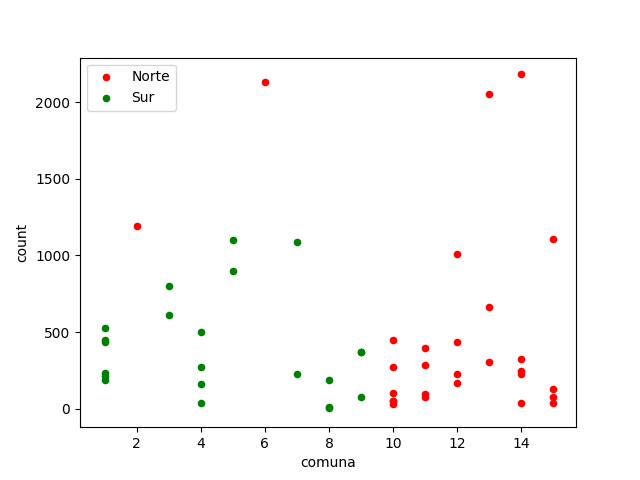

In [381]:
ax = b_norte.plot.scatter(x='comuna',y='count',color='red',label='Norte')
b_sur.plot.scatter(x='comuna', y='count', color='green', label='Sur', ax=ax)

In [399]:
#Hacemos una agrupación por comuna para los distintos barrios
#b_norte.groupby('comuna').count().sort_values('count')

bn_g = b_norte.sort_values(['count'],ascending=False).groupby('comuna').sum().sort_values('count',ascending=False).reset_index()

In [407]:
bs_g = b_sur.sort_values(['count'],ascending=False).groupby('comuna').sum().sort_values('count',ascending=False).reset_index()
bs_g

,comuna,count
0,1.0,2035
1,5.0,1997
2,3.0,1414
3,7.0,1313
4,4.0,975
5,9.0,816
6,8.0,204


<IPython.core.display.Javascript object>


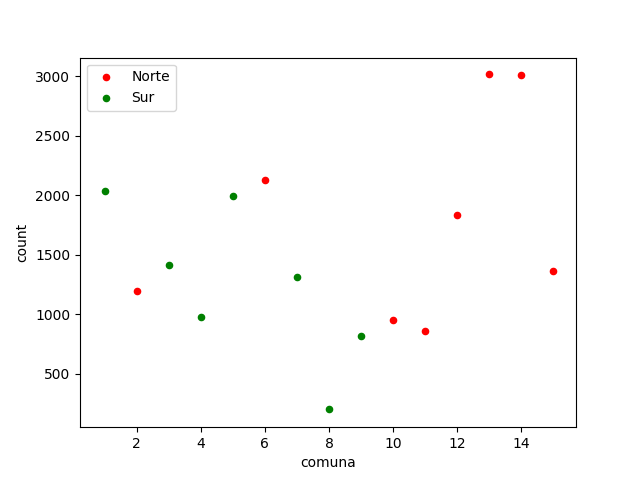

In [409]:
ax = bn_g.plot.scatter(x='comuna',y='count',color='red',label='Norte')
bs_g.plot.scatter(x='comuna', y='count', color='green', label='Sur',ax=ax)
#bn_g.plot.scatter(x='comuna',y='count',color='red',label='Norte')

In [ ]:
# Se puede ver que la mayor cantidad de operaciones corresponde a los barrios de las comunas del Norte
# de la capital federal. En el gráfico este conjunto de comunas se ubica en la parte superior derecha.
# La comuna 4,8,9 son las que menos operaciones registran. Estas tres correspondientes al Sur.

<IPython.core.display.Javascript object>


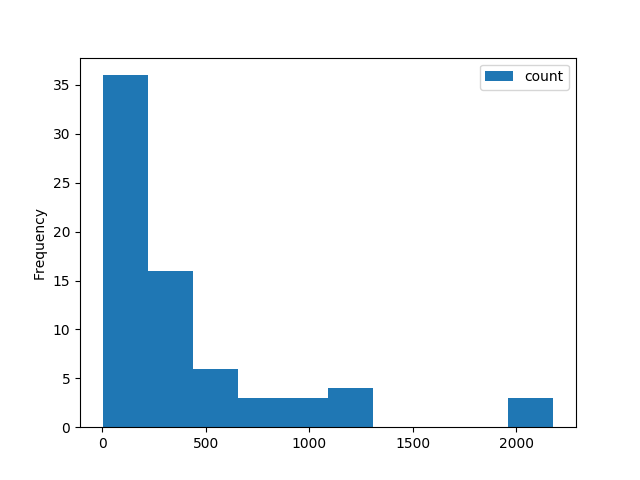

In [351]:
#a.plot(x='place_name',y='count',kind='scatter').show()
a.plot(x='comuna',y='count',kind='hist')
#a.plot()
#s = s.reset_index().rename(columns={'id':'count'})
#s.head(2)
#g_barrio.head(3)

#Con excepcion de la comuna 2(Recoleta) y 6(Caballito)

In [218]:
g_barrio

place_name      surface_covered_in_m2
Boedo           30.0                     412
San Cristobal   40.0                     151
Villa Crespo    34.0                      92
Caballito       36.0                      68
                34.0                      65
San Cristobal   38.0                      63
Caballito       41.0                      60
                40.0                      59
                33.0                      59
                45.0                      58
Villa Crespo    40.0                      56
Belgrano        35.0                      56
Boedo           40.0                      56
Palermo         35.0                      55
Caballito       50.0                      54
Palermo         45.0                      50
Caballito       46.0                      50
Belgrano        34.0                      49
Palermo         50.0                      47
Caballito       52.0                      47
Boedo           35.0                      47
Palermo         4

In [203]:
g_barrio = g_barrio.reset_index().rename(columns={'id':'count'})

In [204]:
g_barrio.head(2)

,place_name,surface_covered_in_m2,count
0,Boedo,30.0,412
1,San Cristobal,40.0,151


In [212]:
g_barrio

,place_name,surface_covered_in_m2,count
0,Boedo,30.0,412
1,San Cristobal,40.0,151
2,Villa Crespo,34.0,92
3,Caballito,36.0,68
4,Caballito,34.0,65
5,San Cristobal,38.0,63
6,Caballito,41.0,60
7,Caballito,40.0,59
8,Caballito,33.0,59
9,Caballito,45.0,58


<IPython.core.display.Javascript object>


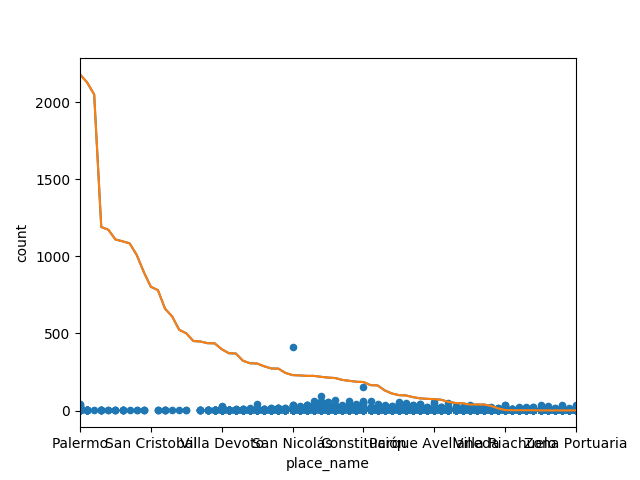

In [209]:
g_barrio.dtypes
g_barrio.plot(x='surface_covered_in_m2',y='count',kind='scatter')#line